In [1]:
# this is to train model to classify apples on basis of color. (13 different Classes)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

2023-10-04 04:46:16.025421: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 04:46:16.375216: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 04:46:16.377936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 04:46:18.353358: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Define dataset directories
train_dir = 'train'
test_dir = 'test'

In [5]:
# Define image dimensions
image_height = 150
image_width = 150
batch_size = 32
epochs = 10

In [6]:

# Data Augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [7]:
# Data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

In [8]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4956 images belonging to 4 classes.
Found 1815 images belonging to 4 classes.


In [9]:

# Create a sequential model
model = tf.keras.models.Sequential()

# Add Convolutional layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten the output for fully connected layers
model.add(tf.keras.layers.Flatten())

# Add fully connected layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))  # 4 output classes for apple varieties

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
# Define a ModelCheckpoint callback to save the best model during training
checkpoint_callback = ModelCheckpoint('color_model.h5', 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      mode='max',
                                      verbose=1)

# Train the model with the checkpoint callback
history = model.fit(train_generator, 
                    epochs=epochs, 
                    validation_data=test_generator, 
                    callbacks=[checkpoint_callback])

Epoch 1/10
155/155 [==============================] - ETA: 0s - loss: 0.4448 - accuracy: 0.8232
Epoch 1: val_accuracy improved from -inf to 0.99394, saving model to color_model.h5


/home/rko10/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


155/155 [==============================] - 96s 610ms/step - loss: 0.4448 - accuracy: 0.8232 - val_loss: 0.0357 - val_accuracy: 0.9939
Epoch 2/10
155/155 [==============================] - ETA: 0s - loss: 0.1544 - accuracy: 0.9427
Epoch 2: val_accuracy did not improve from 0.99394
155/155 [==============================] - 95s 611ms/step - loss: 0.1544 - accuracy: 0.9427 - val_loss: 0.0657 - val_accuracy: 0.9857
Epoch 3/10
155/155 [==============================] - ETA: 0s - loss: 0.1138 - accuracy: 0.9592
Epoch 3: val_accuracy improved from 0.99394 to 1.00000, saving model to color_model.h5
155/155 [==============================] - 96s 621ms/step - loss: 0.1138 - accuracy: 0.9592 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 4/10
155/155 [==============================] - ETA: 0s - loss: 0.0843 - accuracy: 0.9728
Epoch 4: val_accuracy did not improve from 1.00000
155/155 [==============================] - 97s 627ms/step - loss: 0.0843 - accuracy: 0.9728 - val_loss: 0.0082 - val_accu

In [12]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)

57/57 [==============================] - 6s 106ms/step - loss: 0.0083 - accuracy: 0.9956
Test accuracy: 0.9955922961235046


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 147968)            0

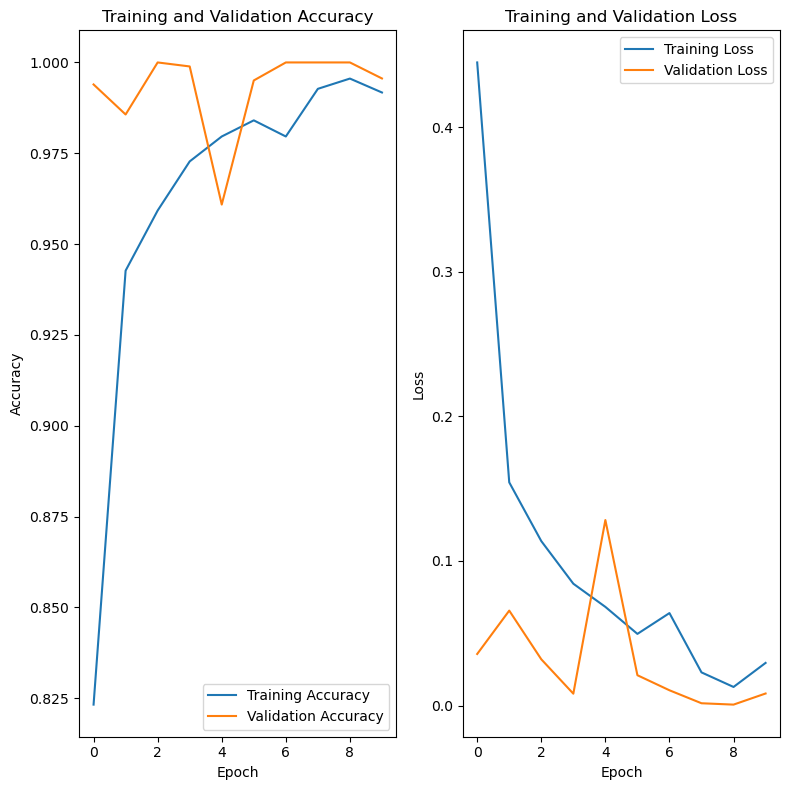

In [14]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()